# Exploratory Data Analysis
- draw histogram for star, issue, pull, fork, branch, and release
- table to compare ml_module created time and bq content time

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
final = pd.read_csv('/sfs/lustre/bahamut/scratch/yt9mh/RA-github/data/total_python.csv')

### Historgram of counts

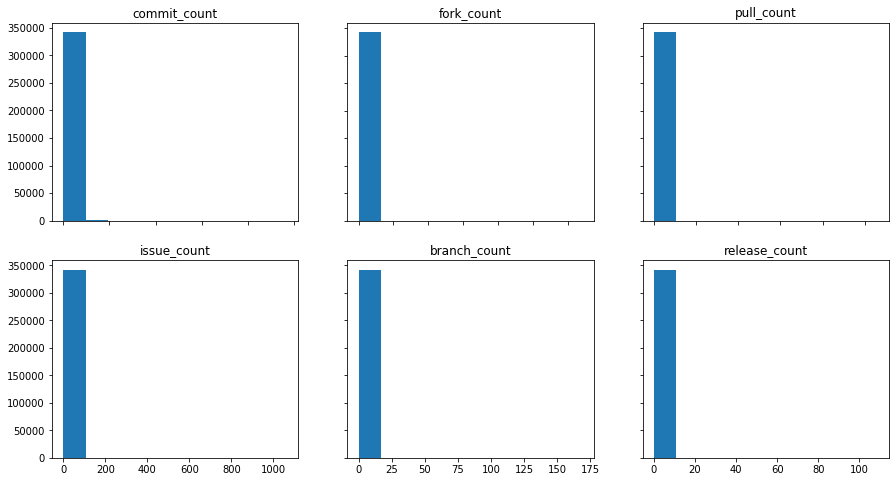

In [71]:
fig, axs = plt.subplots(2, 3,figsize=(15,8))


axs[0, 0].hist(final['commit_count'])
axs[0, 0].set_title('commit_count')
axs[0, 1].hist(final['fork_count'])
axs[0, 1].set_title('fork_count')
axs[0, 2].hist(final['pull_count'])
axs[0, 2].set_title('pull_count')
axs[1, 0].hist(final['issue_count'])
axs[1, 0].set_title('issue_count')
axs[1, 1].hist(final['branch_count'])
axs[1, 1].set_title('branch_count')
axs[1, 2].hist(final['release_count'])
axs[1, 2].set_title('release_count')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()





### Repo using ml module created time and commit time

In [126]:
time = pd.read_csv('py_ml_time_dff.csv')

In [127]:
def to_datetime(df, col):
    df[col] = pd.to_datetime(df[col])


In [128]:
[to_datetime(time, i) for i in list(time)[1:4]]

[None, None, None]

### How many repo is bq time more closer to last commit time?

In [134]:
time[time['bq-create_days'] > time['last-bq_days']]

,repo_name,created_at,last_commit_time,commit_time,bq-create_days,last-bq_days
0,18F/rdbms-subsetter,2014-10-30 21:08:43+00:00,2017-12-13 16:25:08+00:00,2017-10-21 14:15:26+00:00,1086,53
5,Brilliant/sinaweibo_crawler,2015-01-05 05:44:57+00:00,2015-03-24 08:13:02+00:00,2015-03-24 08:13:02+00:00,78,0
10,DataDog/beaker_extensions,2012-02-23 17:05:28+00:00,2019-05-07 20:14:08+00:00,2019-04-30 19:05:53+00:00,2623,7
14,Flat/JiyuuBot,2014-02-22 06:57:09+00:00,2015-10-21 14:39:29+00:00,2015-06-17 06:59:50+00:00,480,126
15,FundersClub/fire,2017-02-15 19:44:40+00:00,2020-02-17 19:07:13+00:00,2018-10-10 21:32:08+00:00,602,494
...,...,...,...,...,...,...
526,uber/sublime-phabricator,2014-02-08 03:25:05+00:00,2015-04-29 22:27:52+00:00,2015-03-04 08:33:23+00:00,389,56
530,uncovertruth/py-geohex3,2015-04-22 05:19:04+00:00,2019-10-22 12:13:55+00:00,2019-10-22 11:21:35+00:00,1644,0
531,underdogio/api-pagination,2015-04-24 23:32:31+00:00,2015-04-27 17:22:19+00:00,2015-04-27 17:17:57+00:00,2,0
533,vecna/onionshare,2014-09-14 21:36:27+00:00,2014-09-16 16:54:54+00:00,2014-09-16 02:09:37+00:00,1,0


### How many repo is bq time more closer or equal to create time?

In [141]:
time[(time['bq-create_days'] <= time['last-bq_days']) & (time['bq-create_days'] > 0)]

,repo_name,created_at,last_commit_time,commit_time,bq-create_days,last-bq_days
1,6aika/issue-reporting,2016-04-19 11:25:19+00:00,2017-05-17 14:11:55+00:00,2016-06-22 09:20:54+00:00,63,329
6,Capgemini/PyPomVisualiser,2015-04-09 07:28:23+00:00,2015-10-28 11:57:18+00:00,2015-04-23 13:54:58+00:00,14,187
7,CenterForOpenScience/SHARE,2014-06-27 15:19:21+00:00,2020-01-13 14:48:09+00:00,2017-03-22 19:27:52+00:00,999,1026
8,Clever/Diamond,2015-06-02 18:49:29+00:00,2017-01-10 22:25:46+00:00,2015-08-27 05:38:01+00:00,85,502
9,CloverHealth/pycon2017,2017-03-22 15:53:31+00:00,2019-11-30 17:25:17+00:00,2017-04-23 05:42:49+00:00,31,951
...,...,...,...,...,...,...
528,udacity/deep-learning,2017-01-13 16:27:59+00:00,2018-12-22 21:54:45+00:00,2017-03-16 05:11:28+00:00,61,646
538,xeneta/LeadQualifier,2016-06-03 12:15:54+00:00,2016-11-16 15:51:43+00:00,2016-06-13 14:15:01+00:00,10,156
539,yahoo/TensorFlowOnSpark,2017-01-20 18:15:57+00:00,2020-03-16 17:50:32+00:00,2018-05-17 18:06:41+00:00,481,668
541,yahoo/serviceping,2015-05-15 18:53:18+00:00,2020-03-13 15:15:20+00:00,2017-01-20 21:19:48+00:00,616,1147
